<center><h1>Chen_Shufen_HW2</h1></center>
<br>
<br>

Name: Shufen Chen
<br>
Github Username: shufench-usc
<br>
USC ID: 9180940635

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [ ]:
# pip install pandas, seaborn, statsmodels, numpy, matplotlib, scikit-learn, Jinja2, ipython
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from IPython.display import display

Get the Cycle Power Plant Data Set

In [62]:
# get the raw data set and convert it into a Dataframe
ccpp = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx")
print(ccpp)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


### (b) Exploring the data

#### i. rows and columns

In [63]:
# get the number of rows and columns
r, c = ccpp.shape 

# get the variables and corresponding description
label_map = {
    "AT": "Ambient Temperature",
    "AP": "Ambient Pressure",
    "RH": "Relative Humidity",
    "V": "Exhaust Vacuum",
    "PE": "Hourly Electrical Energy Output",
}

# print out the answers to b(i)
print(f"There are {r} rows and {c} columns in this data set.")
print("The rows represent records, where each row represents an hourly average observation record of the Cycle Power Plant, \nincluding AT, V, AP, RH, and PE.")
print("The columns represent the variables, including 4 predictors(AT, V, AP, RH) and 1 response variable(PE):")

lm = pd.DataFrame(list(label_map.items()), columns=["Variable", "Description"])
lm.style.hide(axis="index") # pip install Jinja2 to display tables

There are 9568 rows and 5 columns in this data set.
The rows represent records, where each row represents an hourly average observation record of the Cycle Power Plant, 
including AT, V, AP, RH, and PE.
The columns represent the variables, including 4 predictors(AT, V, AP, RH) and 1 response variable(PE):


Variable,Description
AT,Ambient Temperature
AP,Ambient Pressure
RH,Relative Humidity
V,Exhaust Vacuum
PE,Hourly Electrical Energy Output


#### ii. pairwise scatterplots of all the varianbles

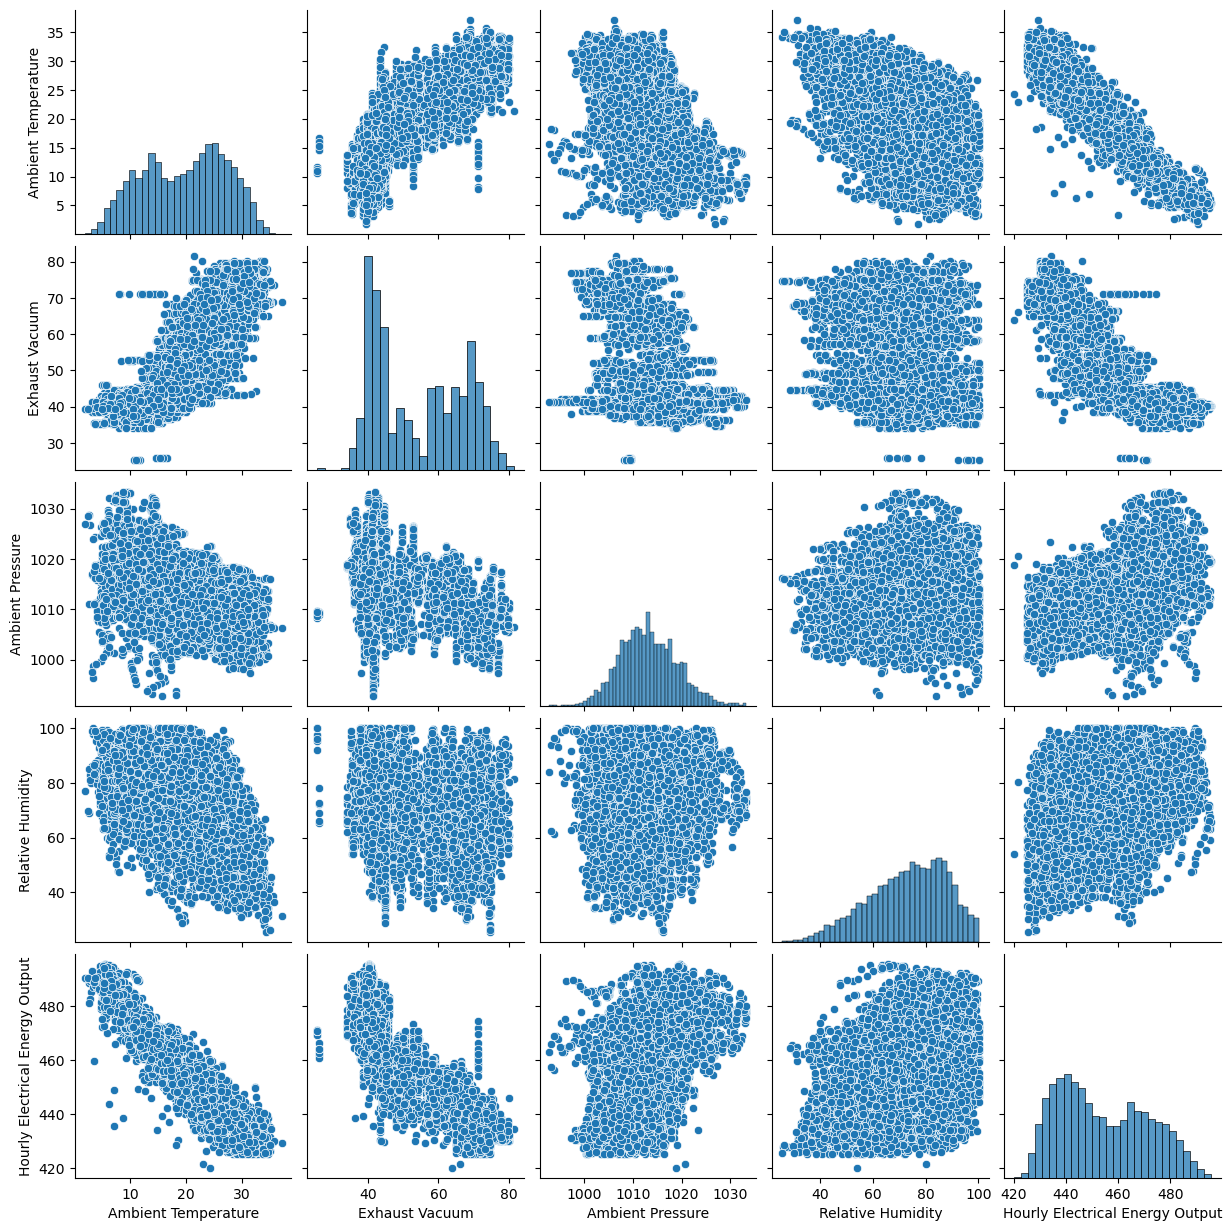

In [64]:
# convert the column labels into full variable names
ccpp_rename = ccpp.rename(columns=label_map)

# pairwise scatterplot of all the variables
g = sns.pairplot(ccpp_rename)

Findings:
1. The relationships between predictors and the response variable
<br>
(a) The hourly average ambient variables Temperature (T) and Exhaust Vacuum (V) are negatively associated with the net hourly electrical energy output (PE) of the plant.
<br> 
(b) Relationship between Ambient Pressure (AP) and the net hourly electrical energy output (PE), and relationship between Relative Humidity (RH) and the net hourly electrical energy output (EP) are weak.

2. The relationships among predictors
<br>
The hourly average ambient variables Temperature (T) and Exhaust Vacuum (V) have a positive relationship. The higher temperature, the higher exhaust vacuum, which might refers to multicollinearity.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [65]:
# get the descriptive statistics of the data set
var_stats = ccpp.describe()

# calculate the range and interquartile ranges of each variable
var_range = var_stats.loc['max']-var_stats.loc['min']
var_iqr = var_stats.loc['75%']-var_stats.loc['25%']

# select and rename the output as required
var_stats.loc['range'] = var_range
var_stats.loc['interquartile range'] = var_iqr

simple_label={'50%':'median','25%':'first quartile','75%':'third quartile'}

var_simple = var_stats.loc[['mean','50%','range','25%','75%','interquartile range']].rename(simple_label)

# display the outcome
var_simple.style

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345000,52.080000,1012.940000,74.975000,451.550000
range,35.300000,56.200000,40.410000,74.600000,75.500000
first quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
third quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
interquartile range,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) Simple Linear Regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:53:28   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 8.851e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:53:55   Log-Likelihood:                -29554.
No. Observations:                9559   AIC:                         5.911e+04
Df Residuals:                    9557   BIC:                         5.913e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.1608      0.154   3232.998      0.000     496.859     497.462
AT            -2.1762      0.007   -297.500      0.000      -2.191      -2.162
==============================================================================
Omnibus:                       12.813   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.792
Skew:                           0.022   Prob(JB):                     0.000614
Kurtosis:                       3.188   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:53:55   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                 2.981e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:54:21   Log-Likelihood:                -33949.
No. Observations:                9567   AIC:                         6.790e+04
Df Residuals:                    9565   BIC:                         6.792e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8210      0.377   1371.733      0.000     517.081     518.561
V             -1.1686      0.007   -172.644      0.000      -1.182      -1.155
==============================================================================
Omnibus:                       73.527   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.192
Skew:                          -0.107   Prob(JB):                     2.89e-22
Kurtosis:                       3.450   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:54:21   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:54:49   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:54:49   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:55:18   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

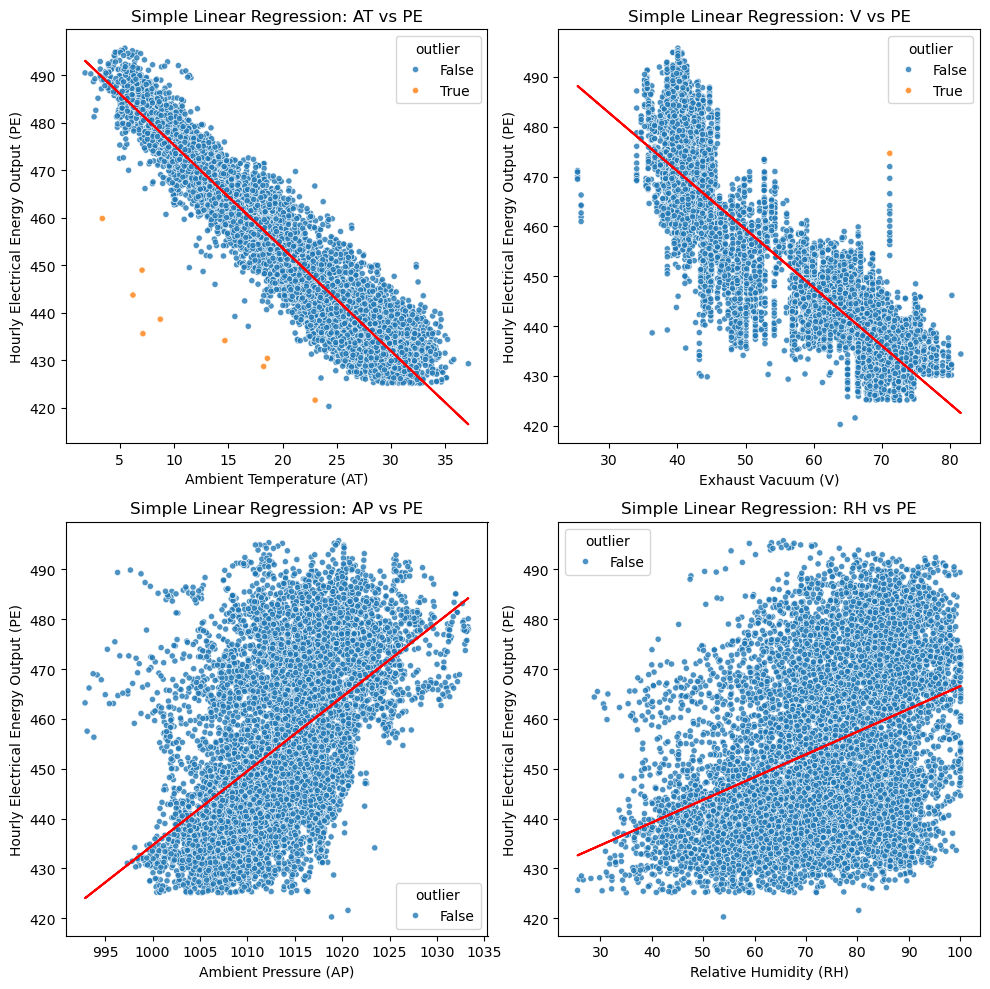

In [66]:
def simple_regression(X_feature, ax):
    """
    Fit a simple linear regression model and evaluate performance.

    Parameters:
        X_feature (str): Column name used as predictor.
        ax: Subplot axis

    Return:
        reg_coef (float): Regression coefficient without removing outliers.
        reg_r_coef (float): Regression coefficient with removing outliers.

    """

    # the predictor(X) and the response variable(y) processing
    y = ccpp["PE"]
    X = ccpp[[X_feature]]
    X_con = sm.add_constant(X)

    # OLS regression model fit
    model = sm.OLS(y, X_con).fit()

    # predict y
    y_pred = model.predict(X_con)

    # get the coefficient of the predictor
    model_coef = model.params[X_feature]

    # display the model outcome
    display(model.summary())

    # find outliers using studentized residuals, Bonferroni correction (alpha=0.05)
    test = model.outlier_test(method="bonf", alpha=0.05)
    outlier_df = ccpp.copy()
    outlier_df["outlier"] = test["bonf(p)"] < 0.05

    #  scatter plot, outliers are highlighted
    sns.scatterplot(
        outlier_df,
        x=X_feature,
        y=y,
        hue="outlier",
        s=20,
        alpha=0.8,
        edgecolor="white",
        linewidth=0.5,
        ax=ax,
    )

    # plot regression line
    ax.plot(X[X_feature], y_pred, color="red")
    ax.set_xlabel(f"{label_map[X_feature]} ({X_feature})")
    ax.set_ylabel("Hourly Electrical Energy Output (PE)")
    ax.set_title(f"Simple Linear Regression: {X_feature} vs PE")

    # remove outliers and fit model again
    outlier_removal = outlier_df[~outlier_df["outlier"]].copy()
    y_r = outlier_removal["PE"]
    X_r = outlier_removal[[X_feature]]
    X_r_con = sm.add_constant(X_r)
    model_r = sm.OLS(y_r, X_r_con).fit()
    model_r_coef = model_r.params[X_feature]
    display(model_r.summary())

    return model_coef, model_r_coef

# an empty list to store model coefficients
coef = []

# create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten() # flatten axes into 1 dimension

# simple regression model in terms of each predictor in ccpp
cols = ccpp.columns[:4]
for ax, col in zip(axes, cols):
    reg, reg_r = simple_regression(col, ax)
    coef.append(reg)

plt.tight_layout()
plt.show()

Findings:
1. All the four models show the statistically significant association between the predictor and the response (F-test, p<0.001).
<br>
(1). The simple linear regression model between Ambient Temperature (AT) and Hourly Electrical Energy Output (PE) explains 89.9% of the variance. AT has a significantly negative association with PE (coef =-2.1713, p<0.05).
<br>
(2). The simple linear regression model between Exhaust Vacuum (V) and Hourly Electrical Energy Output (PE) explains 75.7% of the variance. V has a significantly negative association with PE (coef =-1.1681, p<0.05)
<br>
(3). The simple linear regression model between Ambient Pressure (AP) and Hourly Electrical Energy Output (PE) explains 26.9% of the variance. AP has a significantly positive association with PE (coef =1.4899, p<0.05)
<br>
(4). The simple linear regression model between Relative Humidity (RH) and Hourly Electrical Energy Output (PE) explains 15.2% of the variance. RH has a significantly positive association with PE (coef =0.4557, p<0.05)
2. There are outliers in the first two models, which are highlighted in the scatter plots. After removing the outliers, the models remain significant, but the coefficients of the predictors change slightly. The coefficient for AT changes from −2.1713 to −2.1762, and the coefficient for V changes from −1.1681 to −1.1686. Although these shifts are small, the outliers still influence the estimates and can be considered for removal.

### (d) Multiple Regression

In [67]:
# multiple regression model with all 4 predictors in ccpp
Y = ccpp["PE"]
X = ccpp[["AT", "V", "AP", "RH"]]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
display(model.summary())

coefs = model.params[["AT", "V", "AP", "RH"]]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:55:19   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Findings:
1. The multiple regression model is significant (F-test, p<0.001) and can explain 92.9% of the variance. All the 4 predictors are significant (p<0.05), and can reject the null hypothesis H0 : βj = 0.
2. AT, V and RH have negative associations with PE (coef =-1.9775, -0.2339, and -0.1581 respectively, p<0.05). AP has a positive association with PE (coef =0.0621,p<0.05). 

### (e) 1c Compare to 1d

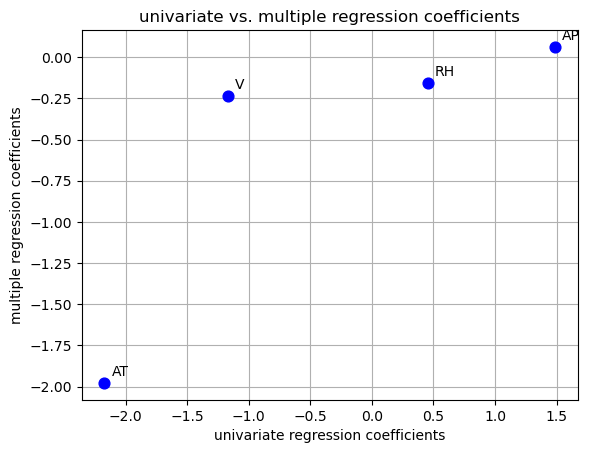

In [68]:
# get and pair the cofficients from simple regression models and the multiple regression model
results = list(zip(coef, coefs))
labels = ["AT", "V", "AP", "RH"]

# plot displaying the univariate regression coefficients from 1c on the x-axis, 
# and the multiple regression coefficients from 1d on the y-axis
for (x, y), label in zip(results, labels):
    plt.scatter(x, y, s=60, color="blue", zorder=3)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(5, 5))

plt.xlabel("univariate regression coefficients")
plt.ylabel("multiple regression coefficients")
plt.title("univariate vs. multiple regression coefficients")
plt.grid(zorder=0)
plt.show()

Findings:
1. Compared with simple regression models, the coefficients of predictors changed in the multiple regression model. AT and V remain negatively associated with PE (coef =-1.9775 and -0.2339, respectively) but their magnitudes are reduced. AP still has a positive association with PE (coef =0.0621, reduced). However, the association between RH and PE reversed. The association is positive (coef =0.4557) in univariate regression but turns into negative in multiple regression (coef =-0.1581).

### (f) Nonlinear Association

In [69]:
def regression_poly_features(X_features):
    """
    Fit a model of the form: Y = β0 + β1X + β2X^2 + β3X^3 + epsilon

    Parameter:
        X_feature (str): Column name used as predictor.

    Returns:
        None.
    """
    # predictors(X) and the response variable(y) processing
    Y = ccpp['PE']
    X = ccpp[[X_features]]
    poly = PolynomialFeatures(degree = 3, interaction_only = False) # get the poly featured predictor
    X_poly = poly.fit_transform(X)

    # OLS model fit
    model = sm.OLS(Y,X_poly).fit()

    # display model outcome and features' names
    display(model.summary())
    display(poly.get_feature_names_out())

# simple regression model in terms of each predictor in ccpp
cols = ccpp.columns[:4]
for col in cols:
    regression_poly_features(col)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:55:20   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
x1            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
x2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
x3             0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array(['1', 'AT', 'AT^2', 'AT^3'], dtype=object)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:55:20   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
x1            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
x2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
x3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array(['1', 'V', 'V^2', 'V^3'], dtype=object)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:55:20   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.057       0.092
x1            25.2556      3.001      8.415      0.000      19.372      31.139
x2            -0.0500      0.006     -8.439      0.000      -0.062      -0.038
x3          2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array(['1', 'AP', 'AP^2', 'AP^3'], dtype=object)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:55:20   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.000     447.744     489.083
x1            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
x2             0.0321      0.007      4.433      0.000       0.018       0.046
x3            -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array(['1', 'RH', 'RH^2', 'RH^3'], dtype=object)

Findings：
1. All four models show a statistically significant association between the predictor and the response (F-test, p<0.001).
2. There is evidence of nonlinear association between any of the predictors and the response, since AT^2, AT^3, V^3, AP^2, AP^3, RH^2, and RH^3 are significantly associated (p<0.05) with PE.


### (g) Interactions of Predictors

In [70]:
# fit a regression model with interactions among the 4 predictors
Y = ccpp["PE"]
X = ccpp[["AT", "V", "AP", "RH"]]
poly = PolynomialFeatures(interaction_only = True)
X_poly = poly.fit_transform(X)

model = sm.OLS(Y, X_poly).fit()
display(model.summary())
display(poly.get_feature_names_out())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:55:20   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.000     531.631     839.934
x1            -4.3470      2.373     -1.832      0.067      -8.999       0.305
x2            -7.6749      1.351     -5.682      0.000     -10.323      -5.027
x3            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
x4             1.5709      0.773      2.031      0.042       0.055       3.087
x5             0.0210      0.001     23.338      0.000       0.019       0.023
x6             0.0018      0.002      0.752      0.452      -0.003       0.006
x7            -0.0052      0.001     -6.444      0.000      -0.007      -0.004
x8             0.0068      0.001      5.135      0.000       0.004       0.009
x9             0.0008      0.000      1.716      0.086      -0.000       0.002
x10           -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array(['1', 'AT', 'V', 'AP', 'RH', 'AT V', 'AT AP', 'AT RH', 'V AP',
       'V RH', 'AP RH'], dtype=object)

Findings:
1. The model shows a statistically significant association between the predictor and the response (F-test, p<0.001).
2. There is evidence of association between interactions and the response, since 'AT V', 'AT RH', 'V AP', and 'AP RH'are significantly associated (p<0.05) with PE.

### (h) Improvement

In [71]:
# an empty list to store models' MSEs
sum_test_mse = {}

# randomly split the data set into tarining set(70%) and test set(30%),random_state=42
Y = ccpp["PE"]
X = ccpp[["AT", "V", "AP", "RH"]]
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.3, random_state=42)
#print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

# linear regression model without interaction or quadratic terms
def linear_regression(X_train, y_train, X_test, y_test):
    """
    Fit a simple linear regression model and evaluate performance.

    Parameters:
        X_train (array_like): Training predictors.
        y_train (array_like): Training Response.
        X_test (array_like): Testing predictors.
        y_test (array_like): Testing Response.

    Returns:
        mse_train (float): Mean squared error on the training set.
        mse_test (float): Mean squared error on the test set.
    """
    # model fit
    model = LinearRegression()
    model.fit(X_train, y_train)

    # predict y
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # calculate the tarining and test mean squared errors
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # return the tarining and test mean squared errors
    return mse_train, mse_test

mse_train, mse_test = linear_regression(X_train, y_train, X_test, y_test)

print(f"Train MSE of linear regression model without interaction or quadratic terms: {mse_train}")
print(f"Test MSE of linear regression model without interaction or quadratic terms: {mse_test}")

# Save the test MSE result into the comparison dictionary
sum_test_mse["Linear regression model without interaction or quadratic terms"] = mse_test

Train MSE of linear regression model without interaction or quadratic terms: 20.580839725738695
Test MSE of linear regression model without interaction or quadratic terms: 21.2398569382255


In [72]:
# linear regression model with interaction and quadratic terms

# predictors(X) processing
poly = PolynomialFeatures(degree=2,interaction_only = False)
X_train_poly = poly.fit_transform(X_train)

# model fit
model = sm.OLS(y_train, X_train_poly).fit()

# display model outcome
display(model.summary())

# get the names of model independent variables
display(poly.get_feature_names_out())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:55:20   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7664.9809   1429.568     -5.362      0.000   -1.05e+04   -4862.572
x1            -7.2885      3.628     -2.009      0.045     -14.401      -0.176
x2            -1.9590      1.765     -1.110      0.267      -5.420       1.502
x3            15.9308      2.772      5.746      0.000      10.496      21.366
x4             3.9121      1.028      3.805      0.000       1.897       5.928
x5             0.0185      0.004      5.031      0.000       0.011       0.026
x6             0.0095      0.003      2.949      0.003       0.003       0.016
x7             0.0046      0.004      1.291      0.197      -0.002       0.011
x8            -0.0053      0.002     -2.963      0.003      -0.009      -0.002
x9            -0.0004      0.001     -0.386      0.700      -0.002       0.001
x10            0.0015      0.002      0.876      0.381      -0.002       0.005
x11           -0.0001      0.001     -0.167      0.867      -0.002       0.001
x12           -0.0078      0.001     -5.765      0.000      -0.010      -0.005
x13           -0.0036      0.001     -3.623      0.000      -0.006      -0.002
x14           -0.0019      0.000     -6.065      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1187.007   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8209.369
Skew:                          -0.669   Prob(JB):                         0.00
Kurtosis:                       8.256   Cond. No.                     2.85e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array(['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH',
       'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2'], dtype=object)

From the p values above and hierarchical principle, x7 = 'AT AP', x9 = 'V^2', x10 = 'V AP', x11 = 'V RH' should be removed (p>0.05)

In [73]:
# remove unsignificant interactio terms from training and test data sets
X_train_reduce = X_train_poly[:,[0,1,2,3,4,5,6,8,12,13,14]]
X_test_poly = poly.fit_transform(X_test)
X_test_reduce = X_test_poly[:,[0,1,2,3,4,5,6,8,12,13,14]]

# linear regression model with interaction and quadratic terms(modified)
mse_train, mse_test = linear_regression(X_train_reduce, y_train, X_test_reduce, y_test)

print(f"Train MSEs: {mse_train}")
print(f"Test MSEs: {mse_test}")

sum_test_mse["Linear regression model with interaction and quadratic terms"] = mse_test

Train MSEs: 17.91781267118613
Test MSEs: 18.694346190808826


### (i) KNN

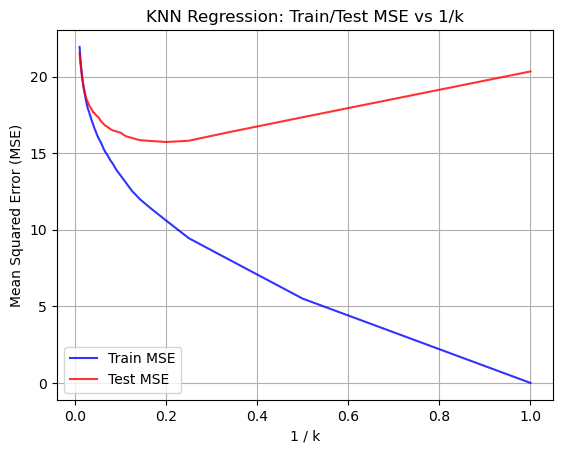

when k = 5, the minimum test MSE is 15.726819842563568


In [74]:
def KNN_regression(X_train, y_train, X_test, y_test):
    """
    Fit a KNN regression model and evaluate performance.

    Parameters:
        X_train (array-like): Training predictors.
        y_train (array-like): Training Response.
        X_test (array-like): Testing predictors.
        y_test (array-like): Testing Response.

    Returns:
        best_k (list): k value(s) corresponding to the minimum Mean Squared Error on the test set
        min_test_mse (float): minimum Mean Squared Error on the test set
    """

    # empty lists to storage Mean Squared Errors on training and test sets
    train_mses = []
    test_mses = []

    # try k from 1 to 100
    k_ls = list(range(1,101))
    for k in k_ls:
        # KNN regression model fit
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)

        # predict y
        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)

        # calculate MSEs on training and test sets
        train_mses.append(mean_squared_error(y_train, y_train_pred))
        test_mses.append(mean_squared_error(y_test, y_test_pred))

    # find the minimum test MSE and best K
    min_test_mse = min(test_mses)
    best_k = [k for k, e in zip(k_ls, test_mses) if e == min_test_mse]

    # calculate 1/k
    k_f = [1/k for k in k_ls]

    # plot the train and test errors in terms of 1/k
    plt.plot(k_f, train_mses, label='Train MSE', color='blue', alpha=0.8)
    plt.plot(k_f, test_mses,  label='Test MSE', color='red', alpha=0.8)

    plt.xlabel("1 / k")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("KNN Regression: Train/Test MSE vs 1/k")
    plt.legend()
    plt.grid()
    plt.show()

    # return best k and minimum test MSE
    return best_k, min_test_mse

# run the KNN regression and store results
k_raw, min_test_mse_raw = KNN_regression(X_train, y_train, X_test, y_test)

print(f'when k = {k_raw[0]}, the minimum test MSE is {min_test_mse_raw}')

sum_test_mse["KNN regression model with raw features"] = min_test_mse_raw

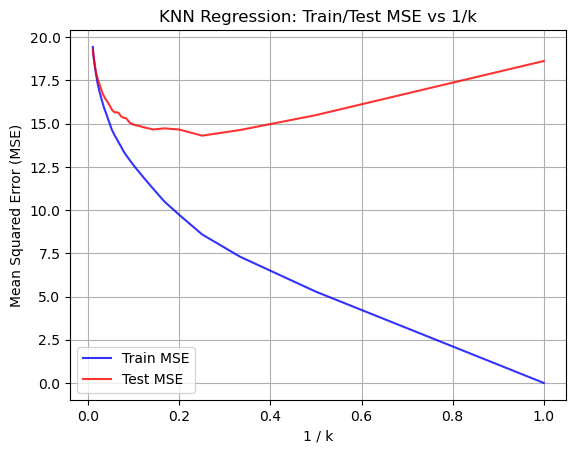

when k = 4, the minimum test MSE is 14.305669422675024


In [75]:
# normalized the predictors on training and test sets
ss= StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# run the KNN regression and store results
k_ss, min_test_mse_ss = KNN_regression(X_train_ss, y_train, X_test_ss, y_test)

print(f'when k = {k_ss[0]}, the minimum test MSE is {min_test_mse_ss}')

sum_test_mse["KNN regression model with normalized features"] = min_test_mse_ss

### (j ) Compare KNN and Linear

In [76]:
# display and compare test MSE results 
compare = pd.DataFrame(list(sum_test_mse.items()), columns=["Model", "MSE"])
compare.style.hide(axis="index")

Model,MSE
Linear regression model without interaction or quadratic terms,21.239857
Linear regression model with interaction and quadratic terms,18.694346
KNN regression model with raw features,15.726820
KNN regression model with normalized features,14.305669


Findings:
1. Linear regression model with interaction and quadratic terms performs better than linear regression model without interaction or quadratic terms, which MSE reduced 2.54 (12.00%)
2. KNN regression model normalized features performs better than KNN regression model with raw features, with which MSE reduced 1.41 (9.03%)
3. Overall, KNN regression models outperform the simple linear regression models. Especially, the KNN regression model with normalized features represents the minimum test MSE among all the models (14.31).
4. Possiblle reasons of difference between KNN and linear regression:
<br>
    (a)There might have some non-linear relationship between predictors and the response variable, which can not be captured entirely by interaction and quadratic terms. The possible multicollinearity existing in predictors might impact the models as well.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

In this case, the flexible statistical method would perform better than an inflexible method. When the sample size n is extremely large and p is small, the flexible method can provide a more accurate estimate of the underlying function with higher complexity and less risk of overfitting.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

In this case, the flexible statistical method would perform worse than inflexible ones. Since there is a large number of predictors, fitting a more flexible model requires estimating too many parameters, but the number of observations is very limited. The overfitting risk would be high.

### (c) The relationship between the predictors and response is highly non-linear.

In this case, the flexible statistical method outperforms the inflexible one. Non-linear relationships can be captured more easily by flexible methods, while inflexible methods such as linear regression would have high bias.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

In this case, the flexible statistical method performs worse. The high variance of the error terms indicates that there is a lot of noise in the data, which might lead to overfitting for flexible methods. On the contrary, inflexible methods have more restrictions, so their estimation will be more robust and stable under high noise.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [77]:
# create a dataframe of the table
obs = pd.DataFrame({
    "Obs.": [1, 2, 3, 4, 5, 6],
    "X1": [0, 2, 0, 0, -1, 1],
    "X2": [3, 0, 1, 1, 0, 1],
    "X3": [0, 0, 3, 2, 1, 1],
    "Y": ["Red", "Red", "Red", "Green", "Green", "Red"]
})

# get the predictor values
X = obs[["X1", "X2", "X3"]].values

# get the test point
test_point = np.array([0, 0, 0])

dists = []
# calculate the euclidean distance bteween each observation and the test point
for i, row in  enumerate(X):
    dist = np.linalg.norm(row - test_point)
    dists.append(dist)

obs["Euclidean Diatance"] = dists
obs.style.hide(axis="index")

Obs.,X1,X2,X3,Y,Euclidean Diatance
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


### (b) What is our prediction with K = 1? Why?

Our prediction with K=1 will be 'Green'. Since the nearest neightbor will be observation 5, which label is 'Green'.

### (c) What is our prediction with K = 3? Why?

Our prediction with K=3 will be 'Red'. When K = 3, the nearest neightbors will be observation 5, 6 and 2. With majority voting, the predicted label of test point will be 'Red'(2 vs. 1).

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

In this case, a small k will be better. In KNN, the decision boundary becomes more flexible with a smaller k, which makes the boundary more aligned with the complex boundary in reality. Since the boundary is highly non-linear, we would expect the best value for k to be small to avoid underfitting.

Reference
1. statsmodels: https://www.statsmodels.org/stable/index.html
2. PolynomialFeatures: https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features
3. sklearn.model_selection.train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
4. Outlier test: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.outlier_test.html